<a href="https://colab.research.google.com/github/samuel36/viu_aprendizaje_supervisado/blob/main/Copia_de_aprendizaje_supervisado_tema1_terminologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/logo_viu.png?raw=true" align="left" hspace="10px" vspace="0px"></p>

<h1> Asignatura de Inteligencia Artificial</h1>


La presente asignatura hace parte del máster oficial en Inteligencia Artificial, impartido en la Universidad Internacional de Valencia (VIU).

<p><a name="contents"></a></p>

# Contenido Tema 1

- <a href="#ML">1. Modelos basados en datos y Machine Learning</a><br>
  - <a href="#modelML">1.1. Modelos que se pueden construir</a><br>
  - <a href="#terms">1.2. Terminología</a><br>
  - <a href="#supML">1.3. Aprendizaje Supervisado</a><br>
  - <a href="#nonsupML">1.4. Aprendizaje no Supervisado</a><br>
  - <a href="#data">1.5. Observaciones acerca de los datos</a><br>
- <a href="#analitica_predictiva_y_estructura_de_datos">2. Analítica predictiva y estructura de datos</a><br>
  - <a href="#analitica_predictiva_en_ia">2.1. Analítica predictiva en IA</a><br>
  - <a href="#ciclo_de_vida_modelo_machine_learning">2.2. Ciclo de vida de un modelo de Machine Learning</a><br>
  - <a href="#tipos_de_datos">2.3. Tipos de datos</a><br>
    - <a href="#datos_tabulares">2.3.1. Datos tabulares</a><br>
    - <a href="#datos_no_sql">2.3.2. Datos No-SQL</a><br>
  - <a href="#bases_de_datos">2.4. Bases de datos</a><br>
    - <a href="#bases_de_datos_sql">2.4.1. Bases de datos SQL</a><br>
    - <a href="#bases_de_datos_no_sql">2.4.2. Bases de datos No-SQL</a><br>
  - <a href="#caracteristicas">2.5. Características</a><br>
  - <a href="#tipos_de_variables">2.6. Tipos de variables</a><br>
- <a href="#evaluacion">3. Evaluación</a><br>

<p><a name="ML"></a></p>

# 1. Modelos basados en datos y Machine Learning

[Contenidos](#contents)

<p><a name="modelML"></a></p>

## 1.1. Modelos que se pueden construir

[Contenidos](#contents)


¿Qué es un modelo derivado de los datos?

Caso ideal: Sabemos las distribuciones de las que vienen los datos. ⇒ podemos calcular analíticamente nuestro modelo.

¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



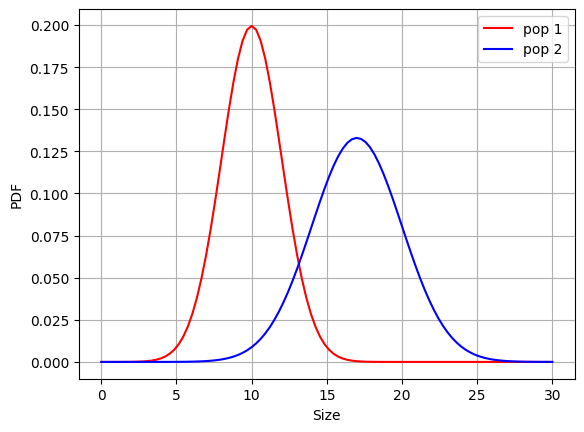

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)


x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

**Cálculo de la frontera óptima** (conocida también como _frontera bayesiana_).

frontera óptima en 13.15


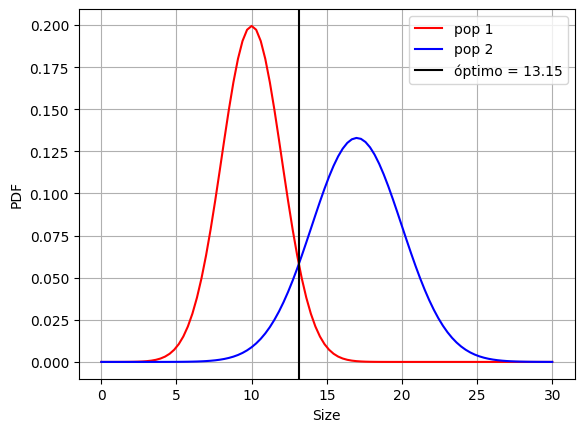

In [2]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

Cálculo analítico de los errores de clasificación

In [3]:
print ("pop 1 error", 1-d1.cdf(minx))
print ("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


### Caso 1D

**Caso real**: Tenemos una muestra de los datos

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [4]:
# Función para construir y graficar datasets con dos grupos, rojos y azules, en una dimensión
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

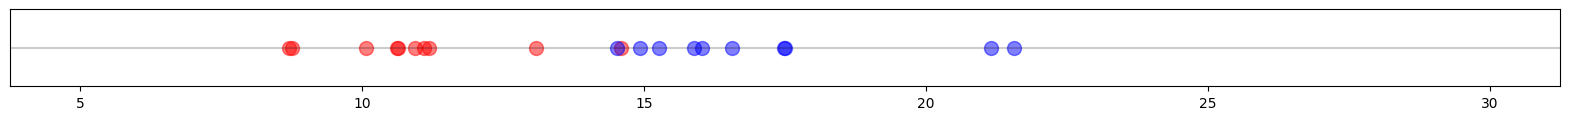

In [5]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

Veamos como se puede mejorar la definición de la frontera a medida que aumentamos la cantidad de muestras.

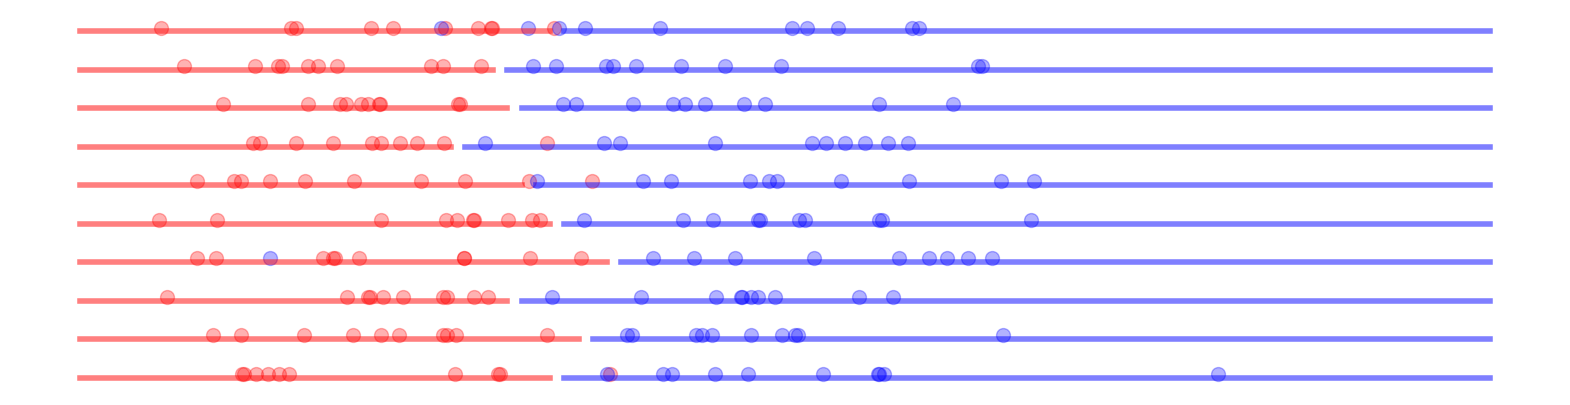

In [8]:
show_1D_dataset_samples(10, dot_alpha=.3)

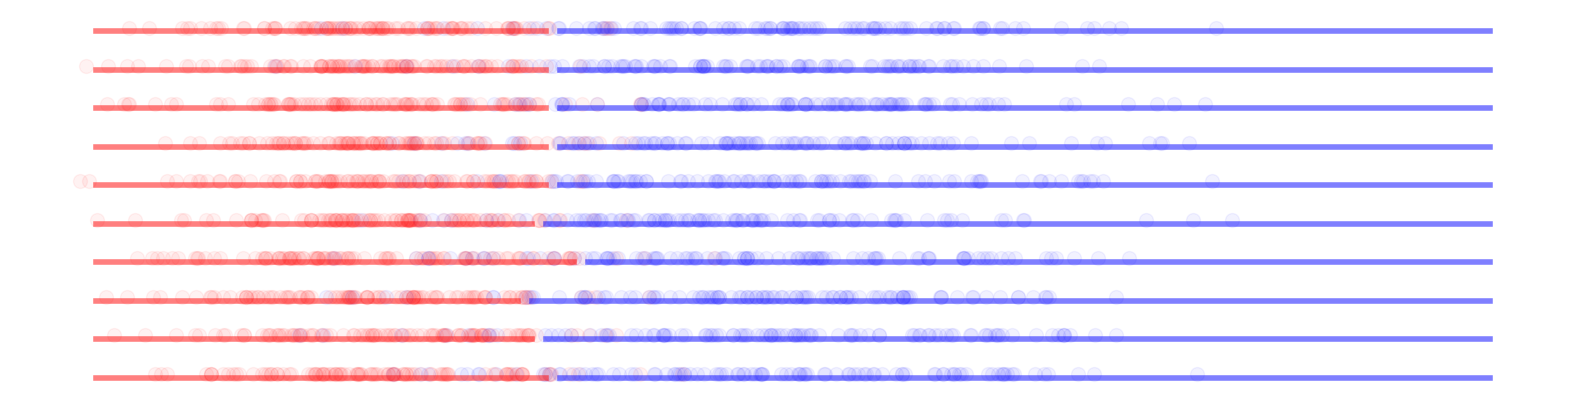

In [9]:
show_1D_dataset_samples(100, dot_alpha=.05)

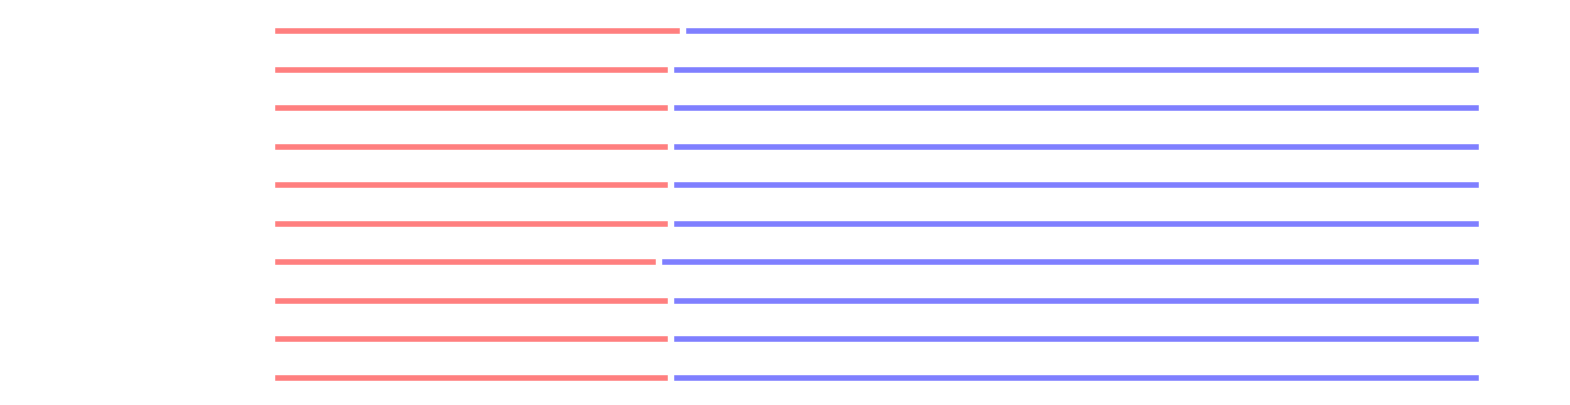

In [10]:
show_1D_dataset_samples(10000, dot_alpha=.001)

### Caso en 2D

- En 2D, un modelo de clasificación **es una frontera** en el plano


- **Objetivo:** hallar la frontera que produce menos error de clasificación


In [15]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"

--2025-07-08 19:06:41--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2025-07-08 19:06:41 (95.6 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [16]:
import mlutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Muestreo de datos "pseudoaleatoria" para clasificar en dos grupos: rojos, azules

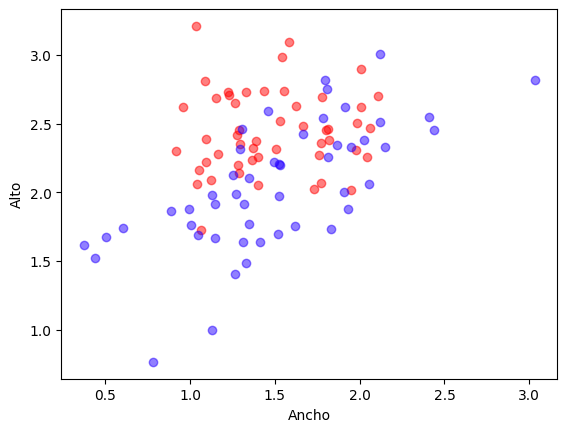

In [17]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0.1,.2]])
X,y = mc.sample(100)
mlutils.plot_2Ddata(X, y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador lineal

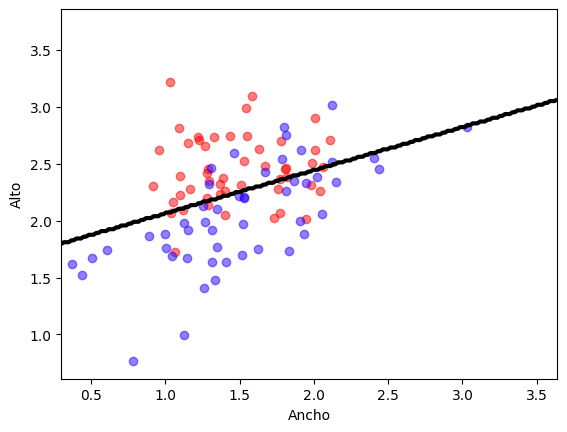

In [18]:
from sklearn.linear_model import LogisticRegression
estimador=LogisticRegression()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador bosque aleatorio

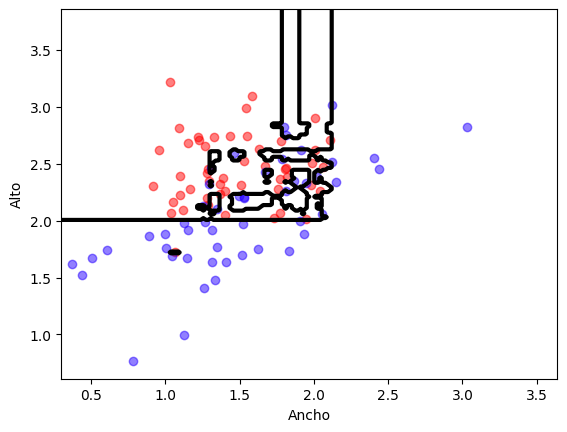

In [19]:
from sklearn.ensemble import RandomForestClassifier
estimador=RandomForestClassifier()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador máquina de soporte vectorial

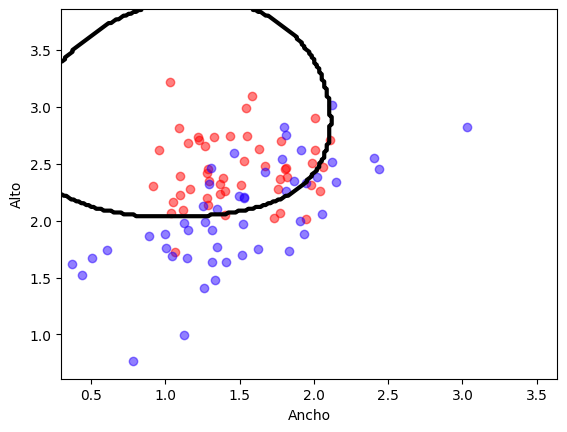

In [20]:
from sklearn.svm import SVC
estimador=SVC()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

**Los algoritmos de machine learning:**

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana. O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

<p><a name="terms"></a></p>

## 1.2. Terminología

[Contenidos](#contents)

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png?raw=true)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.


<p><a name="supML"></a></p>

## 1.3. Aprendizaje supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### 2.3.1 Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados y deseamos utilizarlos para clasificar algunos puntos no etiquetados. Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea. Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


<p><a name="nonsupML"></a></p>

## 1.4. Aprendizaje no Supervisado

[Contenidos](#contents)


El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias
* Detección de anomalías
* Visualización y reducción dimensional


<p><a name="data"></a></p>

## 1.5. Observaciones acerca de los datos

[Contenidos](#contents)

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos.

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características.

### ¡Los datos son más importantes que los algoritmos!

<p><a name="analitica_predictiva_y_estructura_de_datos"></a></p>

# 2. Analítica predictiva y estructura de datos

[Contenidos](#contents)

<p><a name="analitica_predictiva_en_ia"></a></p>

## 2.1. Analítica predictiva en IA

[Contenidos](#contents)

En la analítica predictiva en inteligencia artificial, se hace uso de algoritmos de aprendizaje basado en máquinas con el fin de aprender a diferenciar clases o valores dentro de un conjunto de datos.

De forma general, la inteligencia artificial representa cualquier programa que pueda sensar, evaluar, y adaptarse a un entorno cuantificado. A su vez, la inteligencia artificial está compuesto por diferentes algoritmos de aprendizaje basados en máquinas (**Machine Learning**), que se componen a su vez, en un caso especial del aprendizaje profundo.


<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/images/DL_S01_IA_ML_DL.png" align="center"></p>

En el proceso de aprendizaje para la predicción y toma de decisiones, se involucran varios pasos que serán detallados a continuación.

<p><a name="ciclo_de_vida_modelo_machine_learning"></a></p>

## 2.2. Ciclo de vida de un modelo de Machine Learning

[Contenidos](#contents)

El ciclo de vida de un modelo en Machine learning reune todos aquellos pasos necesarios para reproducir un modelo que predice un comportamiento sobre un conjunto de datos.

El modelo sigue el orden descrito en la siguiente figura


<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/images/DL_S01_ML_Life_Cycle.png" align="center"></p>

1. Recolecta de datos: En donde se extraen los datos que servirán de entrada al modelo.
2. Preparación e ingesta: En la ingesta, los datos que yacen en algun lugar, a la espera de ser consumidos, se traen al flujo de procesamiento en el que darán lugar a un modelo.
3. Manipulación de datos: En este paso, los datos son tratados con el fin de analizar si sus tipos son correctos, si no hay datos faltantes o datos espurios.
4. Análisis de datos: En la analítica de datos, se establecen relaciones de las diferentes características de los datos con la variable objetivo (variable a predecir).
5. Entrenamiento del modelo: El entrenamiento del modelo implica la aplicación de un algoritmo de machine learning que aprende patrones sobre un conjunto de datos.
6. Prueba del modelo: Una vez entrenado el modelo, se reserva un conjunto de datos que no ha visto nuetro modelo para poner a prueba su capacidad predictiva.
7. Despliegue: Cuando estamos satisfechos con el poder predictivo del modelo, puede ser industrializados para hacerlos disponibles a varias personas.

En un ciclo de vida "más real", pueden existir re-procesos si no se alcanzan las métricas deseadas, con el fin de aumentar la capacidad predictiva del modelo


<p><img alt="Colaboratory logo" height="150px" src="https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/images/DL_S01_ML_Life_Cycle_Reprocessing.png" align="center" vspace="15px"></p>

<p><a name="tipos_de_datos"></a></p>

## 2.3. Tipos de datos

[Contenidos](#contents)

<p><a name="datos_tabulares"></a></p>

### 2.3.1. Datos Tabulares

[Contenidos](#contents)

Los datos tabulares representan datos estructurados en forma de tabla. Cada tabla está compuesta por una serie de filas (registros) y columnas (características) que componen a los datos.

Edad| Sexo| Altura| Hipertenso
-- | --| -- | --
15 | M| 1.72 | 0
60 | F|1.64 | 1
12 | M| 1.44 | 0
98 | M| 1.73 | 1
30 | F| 1.81 | 1

Alguno de los formatos en los que se puede encontrar datos tabulares es:

- CSV
- TSV
- Excel
- etc

**Partes de una tabla:**

En la siguiente figura se ilustran las partes que componen a un arreglo tabular.

<p><img alt="Colaboratory logo" height="250px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S01_Table_Parts.png?raw=true" align="center" vspace="15px"></p>

De las partes de las tablas es importante destacar a las características.

<p><a name="datos_no_sql"></a></p>

### 2.3.2. Datos No-SQL
[Contenidos](#contents)

Los datos No-SQL, son conjuntos de datos que son almacenados, comunmente, en parejas de clave-valor. Uno de los formatos más usuales es el formato `JSON`, el cual tiene la siguiente estructura

```
DB = [
    {"Nombre":"Elsa",
     "Edad":23,
     "Ocupacion":"Enfermera",
     "Cedula":8935033,
     "Estado":"Casada"
     },
    {"Nombre":"Andres",
     "Edad":30,
     "Ocupacion":"Psicologo",
     "Cedula":8222223
     }
]
```

En donde alguna entrada, puede contener diferentes características a otra.

Este tipo de datos representan el estándard por excelencia en big data, ya que son datos que escalan de horizontalmente.

<p><a name="bases_de_datos"></a></p>

## 2.4. Bases de datos
[Contenidos](#contents)


Al conjunto de tablas almacenadas relacionadas o no entre si se les conoce con el nombre de base de datos.

Existen dos grupos generales de bases de datos:

- Bases de datos SQL.
- Bases de datos No-SQL.

<p><a name="bases_de_datos_sql"></a></p>

### 2.4.1. Bases de datos SQL

[Contenidos](#contents)

Las bases de datos SQL corresponden a un conjunto de tablas con relaciones entre ellas.

Por ejemplo, en un a empresa de venta de productos, se puede tener una base de datos una tabla "ventas" donde cada venta (registro) puede estar relacionado con uno varios productos en una tabla "producto". En la siguiente figura se ilustran diferentes tablas en un proceso de ventas de productos.

<p><img alt="Colaboratory logo" height="350px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S01_Bases_Datos_SQL.png?raw=true" align="center"></p>

En general, existen las posibles relaciones entre dos tablas a través de sus registros:

- Uno a uno.
- Uno a muchos.
- Muchos a uno.
- Muchos a muchos.

#### Ejercicio:

Discuta las posibles relaciones existentes en la base de datos de la figura anterior.

<p><a name="bases_de_datos_no_sql"></a></p>

### 2.4.2. Bases de datos No-SQL

[Contenidos](#contents)

Las bases de datos SQL corresponde a un conjunto de colecciones, que corresponde a formatos flexibles (JSON, BSON, etc), los cuales amacenan registros con características variables.

En la siguiente figura se ilustra la base de datos "sample_analytics", compuesta por las colleciones accounts, customers y transactions.


<p><img alt="Colaboratory logo" height="300px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S01_Base_Datos_No_SQL.png?raw=true" align="center"></p>

En la siguiente figura se ilustra el contenido almacenado en la colección "accounts" de la base de datos "sample_analytics", correspondietes a archivos con parejas clave-valor:


<p><img alt="Colaboratory logo" height="400px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S01_Collection.png?raw=true" align="center"></p>



<p><a name="caracteristicas"></a></p>

## 2.5. Características

[Contenidos](#contents)

En machine learning, **una característica** es una propiedad medible e individual de algo que se está observando. En otras palabras, las características son las propiedades que utilizamos para caracterizar nuestros datos.

En general, las características pueden derivarse de dos procesos:

- Medidas.
- Cálculos.


Una característica puede ser medida directamente, por ejemplo, la cantidad de veces que un usuario visitó un sitio web, el navegador que usa o el momento en que accedió a un sitio web.

Una característica también podría inferirse a partir de otras características. En este caso son funciones calculadas, por ejemplo, cuando se calcula el tiempo promedio entre visitas a un portal a partir del historial de todas las visitas de un usuario. Al proceso de cálculo de nuevas características se conoce con el nombre de **ingeniería de características**.

Una de las ventajas en ciertas ramas (computer visión) del Deep Learning es que esta ingeniería de características se realiza de forma automática


<p><img alt="Colaboratory logo" height="400px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S01_Deep_Learning_Feature_Engineering.jpeg?raw=true" align="center"></p>

<p><a name="tipos_de_variables"></a></p>

## 2.6. Tipos de variables

[Contenidos](#contents)


Existen dos tipos diferentes de datos: **continuos** o **discretos**. En los datos continuos, una variable puede tomar cualquier valor en un rango finito o no. En los datos discretos, una variable solo puede asumir cierto conjunto de valores.

En la siguiente tabla se ejemplifica un conjunto de variables continuas y discretas


Variables Continuas | Variables Discretas
--|--
Presión | Edad
Velocidad | Edad
Altura | Sexo
Precio | Escolaridad
Aceleración | Número de hijos
Temperatura | Estado marital
Volumen | Especie
Área | Lateralidad

<p><a name="evaluacion"></a></p>

# 3. Evaluacion

[Contenidos](#contents)

In [ ]:
#@markdown 1. Describa los entes que componen la inteligencia artificial y su jerarquía.

#@markdown ---


In [ ]:
#@markdown 2. Enumere los pasos del ciclo de vida de un modelo de machine learning e indique que factores podrian implicar un reproceso.

#@markdown ---


In [ ]:
#@markdown 3. Indique los tipos principales de bases de datos y el tipo de elemento que las compone.

#@markdown ---

In [ ]:
#@markdown 4. Especifique las formas en las que se puede establecer una característica y ejemplifique dichos procesos.

#@markdown ---

In [ ]:
#@markdown 5. Indique que tipos de variables existen y ejemplifique cada caso.

#@markdown ---